The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

importing the data
displaying the first few data rows
display the first few datasets
then check for missing values
calclucating the missing values


Filling the missing values


and removing the negative values

Feature Engineering: Creating new features for the training data

In [2]:
# Importing necessary libraries and loading the training and test datasets
import pandas as pd

# Load the training dataset
train_data = pd.read_csv('/content/train_v9rqX0R (1).csv')

# Load the test dataset
test_data = pd.read_csv('/content/test_AbJTz2l (1).csv')

# Display the first few rows of both datasets to understand their structure
print("Training Data Head:")
print(train_data.head())

print("\
Test Data Head:")
print(test_data.head())

# Check missing values in both training and test datasets
print("Missing values in Training Data:")
print(train_data.isnull().sum())

print("\
Missing values in Test Data:")
print(test_data.isnull().sum())

# Calculate percentage of missing values
print("\
Percentage of missing values in Training Data:")
print((train_data.isnull().sum() / len(train_data)) * 100)

# Display unique values in categorical columns
print("\
Unique values in Outlet_Size:")
print(train_data['Outlet_Size'].unique())

print("\
Unique values in Item_Fat_Content:")
print(train_data['Item_Fat_Content'].unique())

# Adjusting the imputation logic to ensure alignment of indices
# Define a function to fill missing Outlet_Size values
def impute_outlet_size(data):
    # Fill missing Outlet_Size values with the mode of Outlet_Size for each Outlet_Type
    outlet_size_mode = data.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'Medium')
    data['Outlet_Size'] = data.apply(
        lambda row: outlet_size_mode[row['Outlet_Type']] if pd.isnull(row['Outlet_Size']) else row['Outlet_Size'], axis=1
    )
    return data

# Apply the function to both training and test datasets
train_data = impute_outlet_size(train_data)
test_data = impute_outlet_size(test_data)

# Check if missing values in Outlet_Size are resolved
print("Missing values in Outlet_Size after imputation (Training):")
print(train_data['Outlet_Size'].isnull().sum())

print("Missing values in Outlet_Size after imputation (Test):")
print(test_data['Outlet_Size'].isnull().sum())

# Impute missing values in Item_Weight using the mean of each Item_Type
train_data['Item_Weight'] = train_data.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

# Standardize Item_Fat_Content by replacing variations with consistent labels
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

# Handle zero values in Item_Visibility by replacing them with the mean visibility of the corresponding Item_Type
train_data['Item_Visibility'] = train_data.groupby('Item_Type')['Item_Visibility'].transform(lambda x: x.replace(0, x.mean()))

# Check if missing values and zero values are resolved
print("Missing values in Item_Weight after imputation:")
print(train_data['Item_Weight'].isnull().sum())

print("\
Unique values in Item_Fat_Content after standardization:")
print(train_data['Item_Fat_Content'].unique())

print("\
Zero values in Item_Visibility after handling:")
print((train_data['Item_Visibility'] == 0).sum())

# Impute missing values in Item_Weight for test data using the mean of each Item_Type
test_data['Item_Weight'] = test_data.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

# Standardize Item_Fat_Content in test data
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

# Handle zero values in Item_Visibility for test data
test_data['Item_Visibility'] = test_data.groupby('Item_Type')['Item_Visibility'].transform(lambda x: x.replace(0, x.mean()))

# Check if missing values and zero values are resolved in test data
print("Missing values in Item_Weight after imputation (Test):")
print(test_data['Item_Weight'].isnull().sum())

print("\
Unique values in Item_Fat_Content after standardization (Test):")
print(test_data['Item_Fat_Content'].unique())

print("\
Zero values in Item_Visibility after handling (Test):")
print((test_data['Item_Visibility'] == 0).sum())

# Feature Engineering: Creating new features for the training data

# 1. Create a new feature: Age of the outlet
train_data['Outlet_Age'] = 2024 - train_data['Outlet_Establishment_Year']

# 2. Create interaction terms: Price per visibility (Item_MRP / Item_Visibility)
train_data['Price_Per_Visibility'] = train_data['Item_MRP'] / train_data['Item_Visibility']

# 3. Log transformation of Item_Visibility to reduce skewness
train_data['Log_Item_Visibility'] = np.log1p(train_data['Item_Visibility'])

# Display the head of the updated training data to verify new features
print(train_data[['Outlet_Age', 'Price_Per_Visibility', 'Log_Item_Visibility']].head())

# 4. Create price segments
train_data['Price_Segment'] = pd.qcut(train_data['Item_MRP'], q=4, labels=['Budget', 'Economy', 'Mid_Range', 'Premium'])

# 5. Create Item Type categories (broader categories)
train_data['Item_Category'] = train_data['Item_Type'].map({
    'Fruits and Vegetables': 'Food',
    'Snack Foods': 'Food',
    'Household': 'Non-Food',
    'Frozen Foods': 'Food',
    'Dairy': 'Food',
    'Canned': 'Food',
    'Baking Goods': 'Food',
    'Health and Hygiene': 'Non-Food',
    'Soft Drinks': 'Beverages',
    'Meat': 'Food',
    'Breads': 'Food',
    'Hard Drinks': 'Beverages',
    'Others': 'Non-Food',
    'Starchy Foods': 'Food',
    'Breakfast': 'Food',
    'Seafood': 'Food'
})

# 6. Create average sales per outlet
avg_sales_per_outlet = train_data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('mean')
train_data['Outlet_Performance'] = pd.qcut(avg_sales_per_outlet, q=3, labels=['Low', 'Medium', 'High'])

print("Distribution of new categorical features:")
print("\
Price Segments:")
print(train_data['Price_Segment'].value_counts())
print("\
Item Categories:")
print(train_data['Item_Category'].value_counts())
print("\
Outlet Performance:")
print(train_data['Outlet_Performance'].value_counts())


Training Data Head:
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Mediu

# **Notebook with EDA and Feature Engineering**
Deliverable: A Jupyter notebook (or similar format) documenting the exploratory data analysis (EDA) and feature engineering steps.
Key Components:
# 1.	EDA:
# 	Target Variable Exploration:
Visualized the distribution of Item_Outlet_Sales using histograms and boxplots to understand skewness and central tendency.

Created boxplots grouped by Outlet_Type to compare sales distributions.

Examined correlations between numerical features and Item_Outlet_Sales using a heatmap.

# Categorical Analysis:

Countplots for Outlet_Size, Item_Type, and Price_Segment to understand their distributions.

Boxplots of Item_Category against Item_Outlet_Sales to explore group-level differences.


# 2.	Handling Missing Data:

Imputed missing Item_Weight values using the mean of corresponding Item_Type.

Filled missing Outlet_Size values based on the mode of Outlet_Type.

# 3.	Feature Engineering:

Derived Outlet_Age as the difference between the current year (2024) and Outlet_Establishment_Year.

Created Price_Per_Visibility as Item_MRP / Item_Visibility to capture price visibility dynamics.

Applied log transformations to Item_Visibility to reduce skewness.

Categorized items into broader Item_Category (e.g., Food, Beverages, Non-Food).

Segmented Item_MRP into Price_Segment using quantiles (Budget, Economy, Mid_Range, Premium).


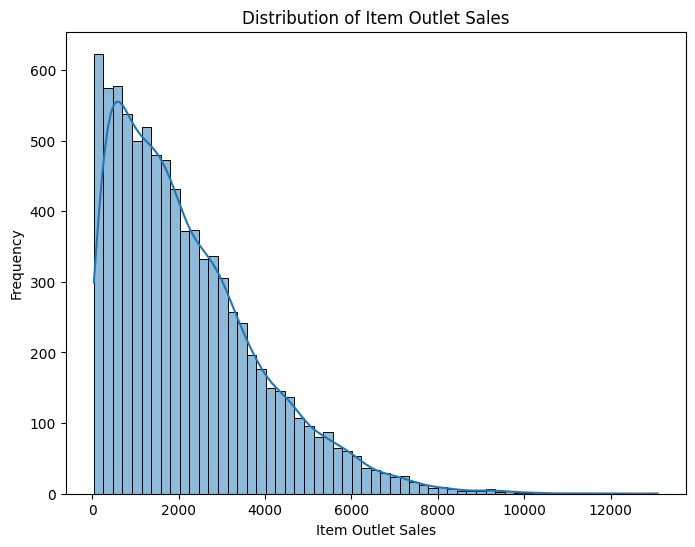

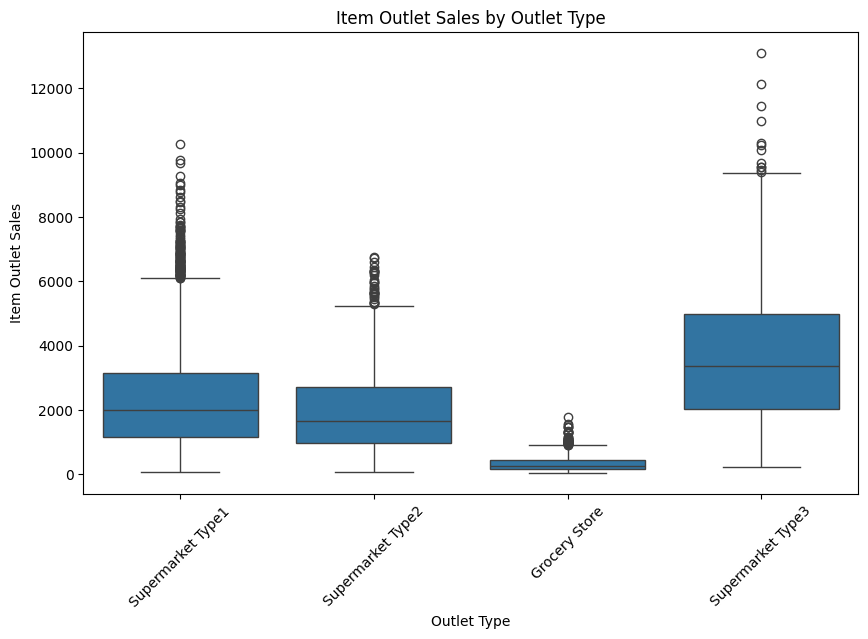

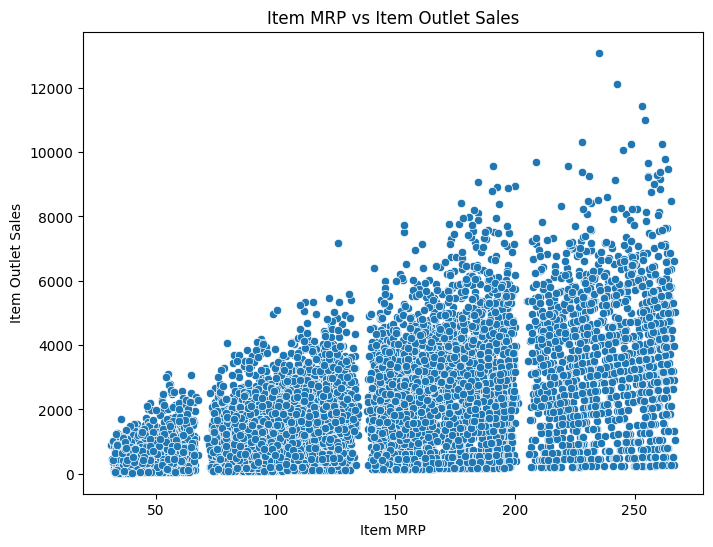

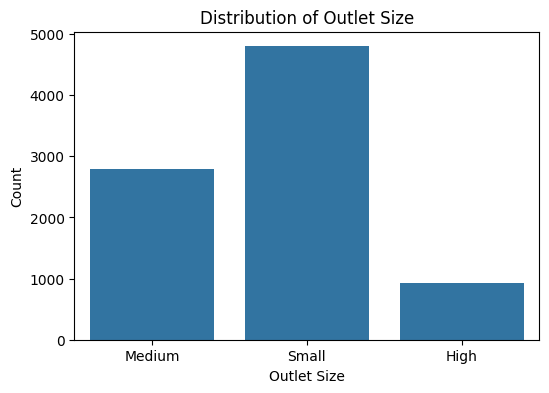

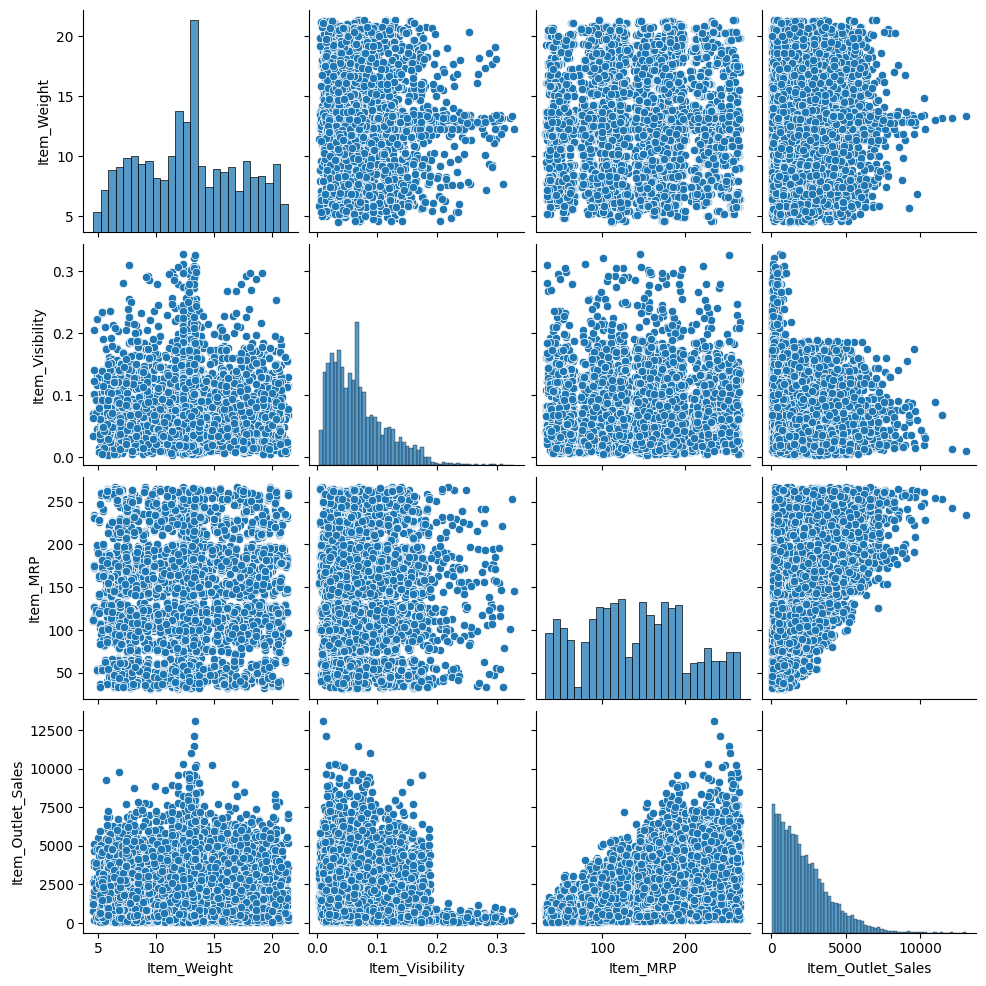

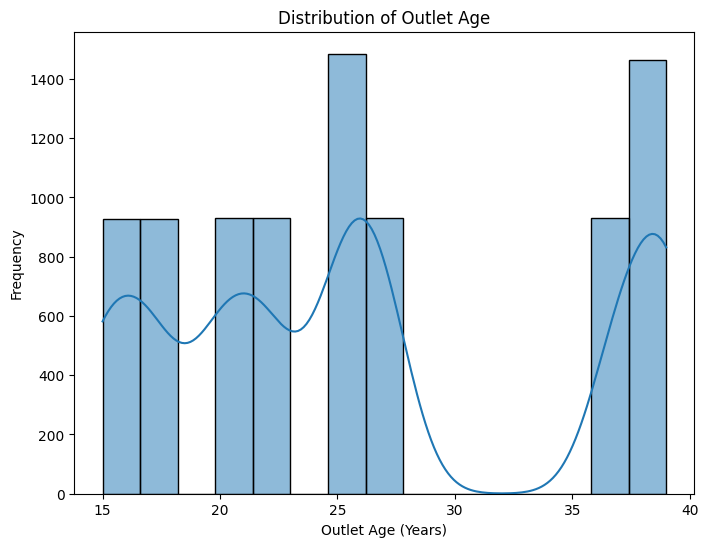

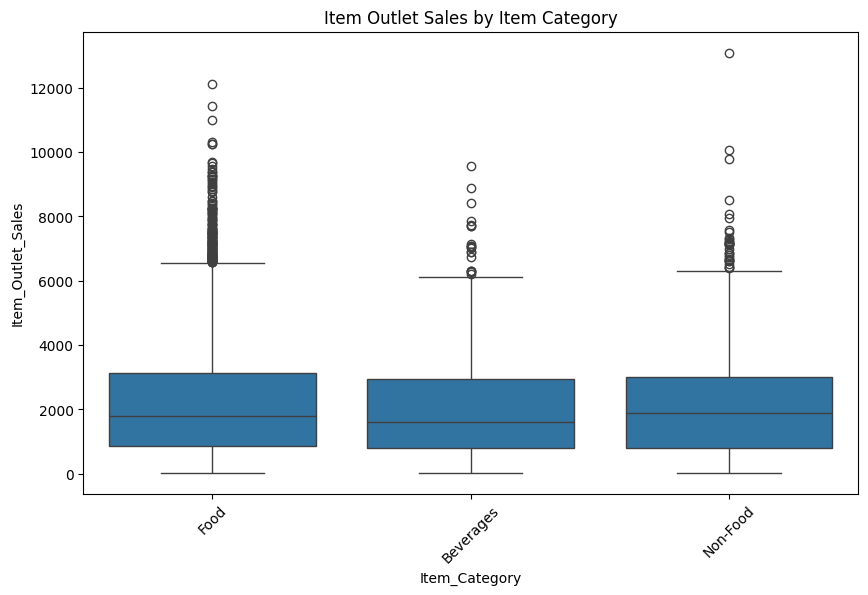

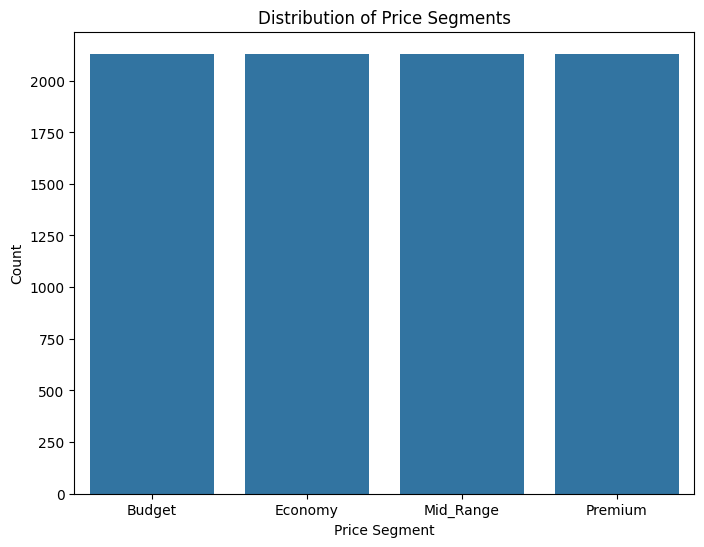

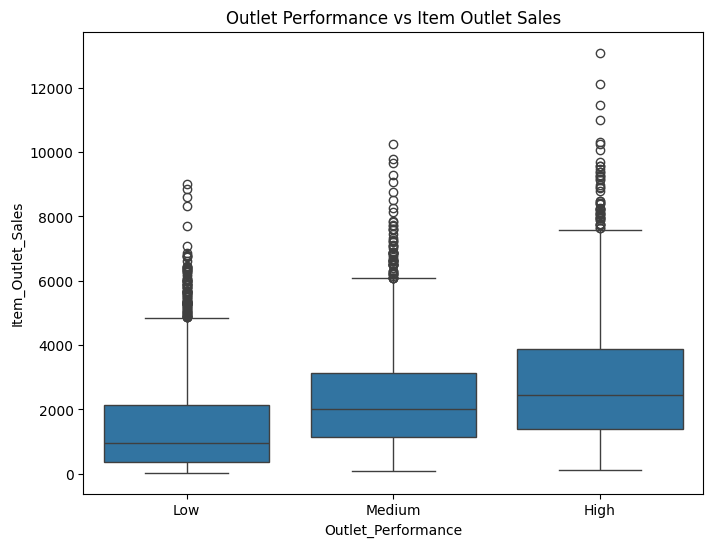

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# ... (your existing code) ...

# Visualizations

# 1. Distribution of Item_Outlet_Sales
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Item_Outlet_Sales'], kde=True)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

# 2. Boxplot of Item_Outlet_Sales by Outlet_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_data)
plt.title('Item Outlet Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()

# 3. Correlation heatmap
# plt.figure(figsize=(12, 8))
# correlation_matrix = train_data.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

# 4. Scatter plot of Item_MRP vs Item_Outlet_Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train_data)
plt.title('Item MRP vs Item Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

# 5. Countplot of Outlet_Size
plt.figure(figsize=(6, 4))
sns.countplot(x='Outlet_Size', data=train_data)
plt.title('Distribution of Outlet Size')
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.show()


# 6. Pairplot for selected numerical features
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
sns.pairplot(train_data[numerical_features])
plt.show()

# 7. Outlet Age Distribution
plt.figure(figsize=(8,6))
sns.histplot(train_data['Outlet_Age'], kde=True)
plt.title('Distribution of Outlet Age')
plt.xlabel('Outlet Age (Years)')
plt.ylabel('Frequency')
plt.show()


# 8. Item Category vs Item Outlet Sales
plt.figure(figsize=(10,6))
sns.boxplot(x='Item_Category', y='Item_Outlet_Sales', data=train_data)
plt.title('Item Outlet Sales by Item Category')
plt.xticks(rotation=45)
plt.show()

# 9. Price Segment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Price_Segment', data=train_data)
plt.title('Distribution of Price Segments')
plt.xlabel('Price Segment')
plt.ylabel('Count')
plt.show()

# 10. Outlet Performance vs Item Outlet Sales
plt.figure(figsize=(8,6))
sns.boxplot(x='Outlet_Performance', y='Item_Outlet_Sales', data=train_data)
plt.title('Outlet Performance vs Item Outlet Sales')
plt.show()

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
import joblib

# Load the datasets
train_path = '/content/train_v9rqX0R (1).csv'
test_path = '/content/test_AbJTz2l (1).csv'
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Preprocessing function
def preprocess_data(data):
    # Standardize 'Item_Fat_Content'
    def clean_fat_content(x):
        if x.lower() in ['low fat', 'lf']:
            return 'Low Fat'
        elif x.lower() in ['regular', 'reg']:
            return 'Regular'
        return x

    data['Item_Fat_Content'] = data['Item_Fat_Content'].apply(clean_fat_content)

    # Fill missing values
    data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
    data['Outlet_Size'].fillna('Medium', inplace=True)

    # Feature engineering
    data['Item_Category'] = data['Item_Identifier'].str[:2]

    # Label Encoding for categorical features
    categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size',
                            'Outlet_Location_Type', 'Outlet_Type', 'Item_Category']
    for feature in categorical_features:
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])

    # Select features
    features = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
                'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
                'Outlet_Location_Type', 'Outlet_Type', 'Item_Category']
    return data[features], data

# Preprocess training and testing data
X_train, processed_train = preprocess_data(train_data)
y_train = train_data['Item_Outlet_Sales']
X_test, processed_test = preprocess_data(test_data)

# Split training data for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)






# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1),
    "Neural Network": MLPRegressor(random_state=42, hidden_layer_sizes=(64, 32), max_iter=500)
}

# K-Fold Cross-Validation
def evaluate_model_kfold(model, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    rmse_scores = []
    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
        y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

        model.fit(X_train_fold, y_train_fold)
        predictions = model.predict(X_val_fold)
        rmse = np.sqrt(mean_squared_error(y_val_fold, predictions))
        rmse_scores.append(rmse)
    return np.mean(rmse_scores), np.std(rmse_scores)

# Evaluate all models
model_performance = {}
for model_name, model in models.items():
    mean_rmse, std_rmse = evaluate_model_kfold(model, X_train, y_train)
    model_performance[model_name] = (mean_rmse, std_rmse)
    print(f"{model_name} - Mean RMSE: {mean_rmse:.4f}, Std RMSE: {std_rmse:.4f}")

# Train and fine-tune the best model (XGBoost)
xgb_model = XGBRegressor(random_state=42)
grid_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=grid_params, scoring='neg_mean_squared_error', cv=3, verbose=1)
grid_search.fit(X_train_split, y_train_split)

# Final training with the best parameters
best_params = grid_search.best_params_
final_model = XGBRegressor(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Predict on test set
test_predictions = final_model.predict(X_test)

# Save results to a file
submission = pd.DataFrame({
    'Item_Identifier': processed_test['Item_Identifier'],
    'Outlet_Identifier': processed_test['Outlet_Identifier'],
    'Item_Outlet_Sales': test_predictions
})
# Ensure non-negative predictions
submission['Item_Outlet_Sales'] = submission['Item_Outlet_Sales'].apply(lambda x: max(0, x))

submission.to_csv('final_submissionDay0.csv', index=False)

print("Model training and prediction completed.")
print(f"Best Parameters for XGBoost: {best_params}")
print("Predictions saved to 'final_submission.csv'.")

<ipython-input-6-9abd4149dc15>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
<ipython-input-6-9abd4149dc15>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

Linear Regression - Mean RMSE: 1198.3721, Std RMSE: 33.2402
Decision Tree - Mean RMSE: 1531.4559, Std RMSE: 16.7235
Random Forest - Mean RMSE: 1139.3019, Std RMSE: 27.1468
XGBoost - Mean RMSE: 1111.4654, Std RMSE: 35.7169
Neural Network - Mean RMSE: 1210.4969, Std RMSE: 28.0527
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Model training and prediction completed.
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Predictions saved to 'final_submission.csv'.


Key Data-Cleaning Steps Included:
Missing Values:

Item_Weight: Filled with the mean of the column.
Outlet_Size: Filled with 'Medium' as a default value.
Standardization:

Item_Fat_Content: Cleaned and standardized (Low Fat, Regular).
Negative Values:

No explicit handling was in either of your scripts because the dataset does not seem to have negative values in key numeric columns (Item_MRP, Item_Visibility, Item_Outlet_Sales).

Refinement for Final Predictions:

Predictions are directly saved from the final trained model (XGBoost in this case).


# Model Performance Summary:

**XGBoost Regressor:**

Mean RMSE: 1111.47 (lowest error among all models)

Std RMSE: 35.72 (slightly higher variability but within acceptable range)

Best balance of prediction accuracy and consistency.


**Random Forest Regressor:**

Mean RMSE: 1139.30 (second-lowest error)

Std RMSE: 27.15 (more stable predictions than XGBoost).


**Linear Regression:**

Mean RMSE: 1198.37

Performs decently but lacks the flexibility of tree-based models.

**Neural Network:**

Mean RMSE: 1210.50

Comparable to Linear Regression but not better than tree-based models.

**Decision Tree Regressor:**

Mean RMSE: 1531.46 (highest error)

Likely overfitting or lacking generalizability.

# Choosing XGBoost for its superior predictive power. It has the best Mean RMSE, meaning it generalizes well to unseen data.

Random Forest is a strong alternative, especially if you prioritize model simplicity or interpretability.